In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import os

Here we import the data. For this analysis, we will be exclusively working with the Training set. We will be validating based on data from the training set as well. For our final submissions, we will make predictions based on the test set.

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train, test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

### Project Planning

Let's outline the main steps of the project:
- Understanding the nature of the data .info() .describe()
- Exploratory analysis - histograms, boxplots and value counts
- Deal with missing data
- Check metrics correlation
- Themes to look into:
  - Level of wealth as a predictor
  - Location of cabin as a predictor
  - Age
  - Title
- Feature engineering
- Data preprocessing and scaling
- Baseline models
- Trained models
- Comparison.

<div align="center">
  <h3>Data Dictionary</h3>
</div>

| Variable  | Definition                | Key                                       |
|-----------|---------------------------|-------------------------------------------|
| survival  | Survival                  | 0 = No, 1 = Yes                           |
| pclass    | Ticket class              | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex       | Sex                       |                                           |
| Age       | Age in years              |                                           |
| sibsp     | # of siblings/spouses     |                                           |
| parch     | # of parents/children     |                                           |
| ticket    | Ticket number             |                                           |
| fare      | Passenger fare            |                                           |
| cabin     | Cabin number              |                                           |
| embarked  | Port of Embarkation       | C = Cherbourg, Q = Queenstown, S = Southampton |


### Data Exploration

**1) For numeric data:**
   - Made histograms to understand distributions
   - Corrplot
   - Pivot table comparing survival rate across numeric variables

**2) For Categorical Data:**
   - Made bar charts to understand balance of classes
   - Made pivot tables to understand the relationship with survival
survival
survival
urvival

In [3]:
#quick look at our data types & null counts 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


##### Two colums stand out:
- Cabin is mostly null values which will need to be looked into and dealt with;
- Age has a significant number of null vlaues as well which will also need to be investigated;

In [4]:
# An overview of the central tendencies of the numeric data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# Quick way of separating the numeric columns
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = train[['Age','SibSp','Parch','Fare']]
df_categorical = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

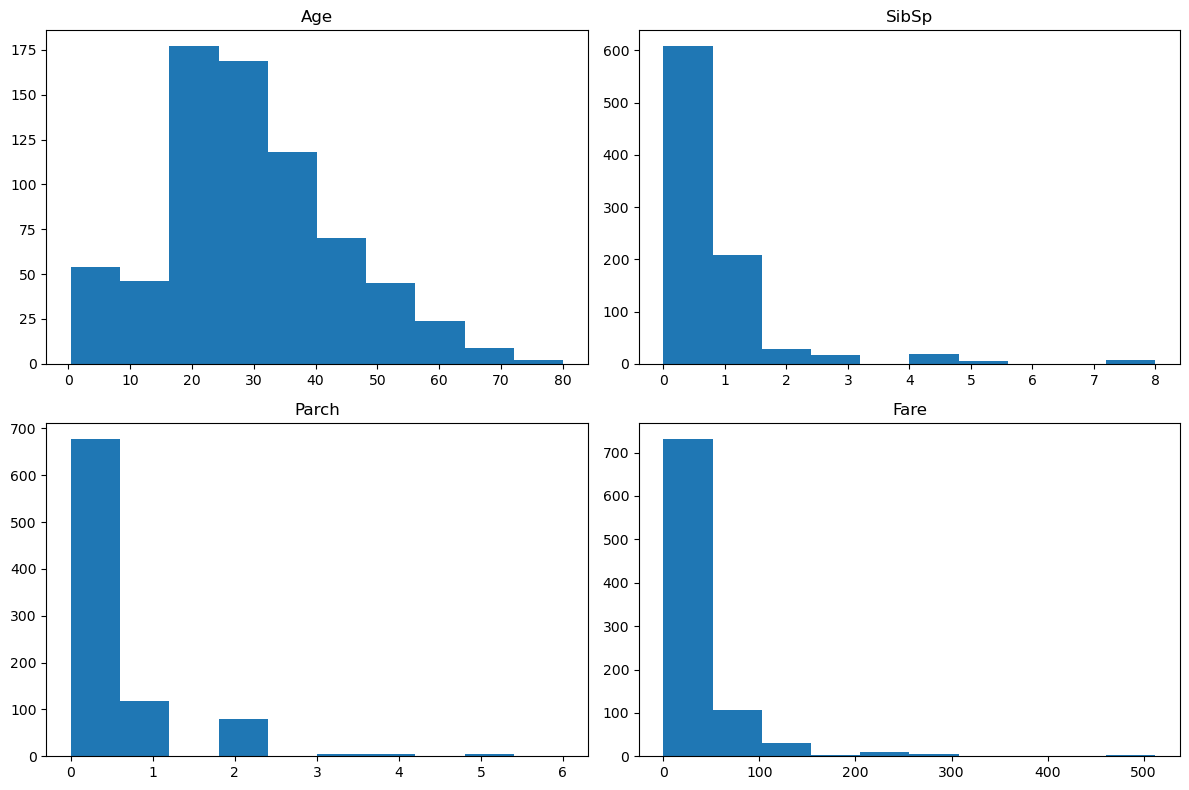

In [7]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

We have a normal distribution for the age column. The rest are all good candidates for normalization since they are skewed quite heavily.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

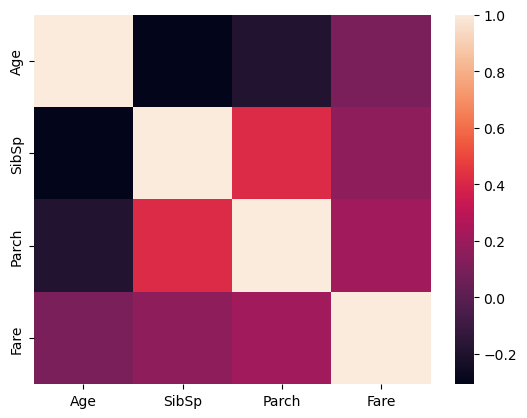

In [8]:
# A look at the correlation of our numeric columns
print(df_numeric.corr())
sns.heatmap(df_numeric.corr())

In [9]:
# A look at survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(
    data = train,
    values = ['Age', 'SibSp', 'Parch', 'Fare'],
    index = 'Survived'
)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


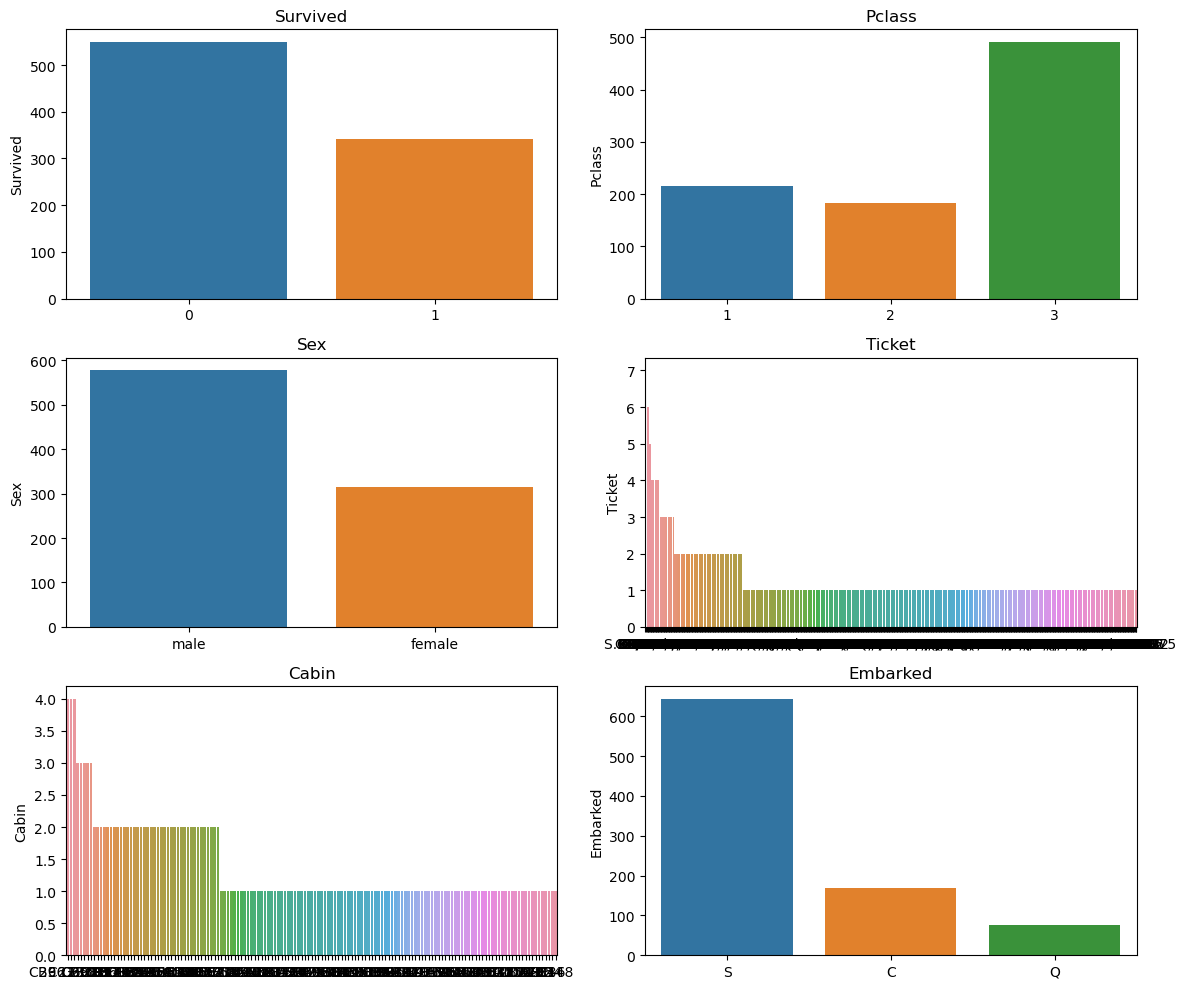

In [10]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Cabin and ticket graphs are very messy. Some feature engineering may be in order.

In [11]:
# Survival by Pcalss
pd.pivot_table(
    train, 
    index='Survived', 
    columns='Pclass', 
    values='Ticket', 
    aggfunc='count'
)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [12]:
# Survival by Sex
pd.pivot_table(
    train, 
    index='Survived', 
    columns='Sex', 
    values='Ticket', 
    aggfunc='count'
)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [13]:
# Survival by embarked
pd.pivot_table(
    train, 
    index='Survived', 
    columns='Embarked', 
    values='Ticket', 
    aggfunc ='count'
)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


### Feature Engineering
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
2) Tickets - Do different ticket types impact survival rates?
3) Name - Does a person's title relate to survival rates? I am curious if the captain went down with the ship.

#### Cabin
After looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this:
 - Single letters
 - Multiple letters

In [14]:
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [15]:
pd.pivot_table(
    train, 
    index='Survived', 
    columns='cabin_multiple', 
    values='Ticket', 
    aggfunc='count'
)

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [16]:
# Creates categories based on the cabin letter (n stands for null). In this case we will treat null values like a separate category.
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])
print(train.cabin_adv.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


In [17]:
# Comparing surivial rate by cabin
pd.pivot_table(
    train, 
    index='Survived', 
    columns='cabin_adv', 
    values='Name', 
    aggfunc='count'
)

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [18]:
# Taking a better look a the ticket values. Numeric vs non numeric:
train['numeric_ticket'] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower() if len(x.split(' ')[:-1]) > 0 else 0)
train['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [19]:
# Lets us view all rows in dataframe through scrolling
train['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [20]:
# Difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(
    train, 
    index='Survived',
    columns='numeric_ticket',
    values='Ticket',
    aggfunc='count'
)

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [21]:
# Survival rate across different ticket types 
pd.pivot_table(
    train,
    index='Survived',
    columns='ticket_letters',
    values='Ticket',
    aggfunc='count'
)

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [22]:
train.Name.head(50)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [23]:
# Let's pull out the title as a separate feature with values of - Mr., Ms., Master. etc
train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

### Data Preprocessing for Model Training

1) Drop null values from Embarked (only 2)
2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with). Variables which will be retained:
    - Pclass
    - Sex
    - Age
    - SibSp
    - Parch
    - Fare
    - Embarked
    - cabin_adv
    - cabin_multiple
    - numeric_ticket
    - name_title
3) Apply categorical transformation on all of the available data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data using this method.
4) Impute data with mean for fare and age (Also experimented with median)
5) Normalized fare using logarithm to give more semblance of a normal distribution
6) Scaled data 0-1 with standard scaler

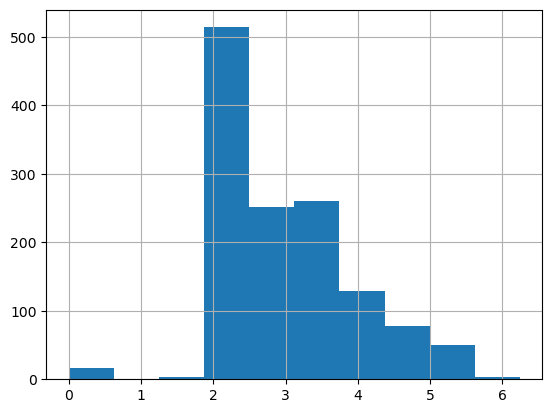

In [24]:
# Setting up all categorical variables that will be used for both the training and the test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(train.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(train.Fare.median())

# Drop null 'Embarked' rows as they are of no relevance (2 instances in the tarining set and none in the testing set)
all_data.dropna(subset=['Embarked'], inplace=True)

# Attempted log norm of sibsp (not used)
#all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
#all_data['norm_sibsp'].hist()

# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# Converting fare to a categorical feature for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

# Createing dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked', 
                                       'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', 'train_test']])

### Train/Test split

In [25]:
# I want to make sure that the data remains as a pandas dataframe when splitting. Features get split based on the train_test flag from earlier:
X_train = pd.DataFrame(all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1))
X_test = pd.DataFrame(all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1))

# Same logic for training labels
y_train = pd.DataFrame(all_data[all_data.train_test==1].Survived)
y_train = y_train.squeeze()
print('y_train shape ->', y_train.shape)

y_train shape -> (889,)


In [26]:
# Now to Scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test==1].Survived

### Model Building (Baseline Validation Performance)

Before going further, I like to see how various different models perform with default parameters. I tried the following models using 5 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. Just because a model has a high basline on this validation set doesn't mean that it will actually do better on the eventual test set.

- Naive Bayes (<b>72.2%</b>)
- Logistic Regression (<b>82.2%</b>)
- Decision Tree (<b>77.7%</b>)
- K Nearest Neighbor (<b>80.9%</b>)
- Random Forest (<b>80.2%</b>)
- Support Vector Classifier (<b>83.3%</b>)
- Xtreme Gradient Boosting (<b>81.1%</b>)
- Soft Voting Classifier - All Models (<b>82.7%</b>)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [85]:
def model_evaluation(models: dict, X_train, y_train):
    trained_models = {}
    for model_name, model in models.items():
        if model_name in ['KNeighbors Classifier']:
            cv = cross_val_score(model, X_train.values, y_train, cv=5, scoring='accuracy')  # converting X_train to np.array with .values to avoid warning
        else:
            cv = cross_val_score(model, X_train, y_train, cv=5)
    
        cv_rounded = [f"{round(score * 100, 1)}%" for score in cv]
        cv_mean = f"{round(cv.mean() * 100, 1)}%"
        
        print(f"{model_name}:\n- CV scores: {' | '.join([item for item in cv_rounded])}\n- CV mean: {cv_mean}\n")


        model.fit(X_train, y_train)
        predictions = model.predict(X_train).astype(int)
        mae, rmse, r2_square = evaluate_model(y_train, predictions)

        print(f"- mae: {mae}")
        print(f"- rmse: {rmse}")
        print(f"- r2_square: {r2_square}")
        print()

In [86]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=1),
    'Random Forest Classifier': RandomForestClassifier(random_state=1),
    'GaussianNB': GaussianNB(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'XGB Classifier': XGBClassifier(random_state=1)
}

In [87]:
model_evaluation(models, X_train, y_train)

Logistic Regression:
- CV scores: 82.6% | 80.9% | 80.3% | 82.0% | 85.3%
- CV mean: 82.2%

- mae: 0.16197975253093364
- rmse: 0.4024670825433226
- r2_square: 0.314175506268081

Decision Tree Classifier:
- CV scores: 75.8% | 74.7% | 82.6% | 74.7% | 80.8%
- CV mean: 77.7%

- mae: 0.012373453318335208
- rmse: 0.11123602527209972
- r2_square: 0.947610628951034

Random Forest Classifier:
- CV scores: 80.9% | 79.2% | 84.8% | 73.6% | 82.5%
- CV mean: 80.2%

- mae: 0.012373453318335208
- rmse: 0.11123602527209972
- r2_square: 0.947610628951034

GaussianNB:
- CV scores: 66.9% | 70.2% | 77.0% | 75.8% | 72.9%
- CV mean: 72.6%

- mae: 0.24859392575928008
- rmse: 0.49859194313514543
- r2_square: -0.05255009107468123

KNeighbors Classifier:
- CV scores: 77.0% | 79.8% | 80.9% | 82.0% | 85.3%
- CV mean: 81.0%



AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [31]:
model_evaluation(models, X_train_scaled, y_train)

Logistic Regression:
- CV scores: 82.6% | 80.9% | 80.3% | 82.0% | 85.3%
- CV mean: 82.2%

Decision Tree Classifier:
- CV scores: 75.8% | 74.7% | 82.6% | 74.7% | 80.8%
- CV mean: 77.7%

Random Forest Classifier:
- CV scores: 80.3% | 79.2% | 84.8% | 73.6% | 82.5%
- CV mean: 80.1%

GaussianNB:
- CV scores: 66.9% | 70.2% | 75.8% | 74.7% | 73.4%
- CV mean: 72.2%

KNeighbors Classifier:
- CV scores: 79.8% | 79.2% | 83.1% | 79.8% | 85.3%
- CV mean: 81.4%

SVC:
- CV scores: 85.4% | 82.0% | 82.6% | 80.3% | 86.4%
- CV mean: 83.4%

XGB Classifier:
- CV scores: 80.3% | 80.9% | 85.4% | 78.7% | 80.2%
- CV mean: 81.1%



### Voting classifier 

The VotingClassifier in scikit-learn combines the predictions from multiple individual classifiers to make a final prediction. There are two main types of voting strategies:

- Hard Voting Classifier - In the hard voting scheme, each classifier in the ensemble casts a single "vote" for a particular class ("yes" or "no"). The final prediction is determined by a majority vote. To ensure a decisive outcome, it's recommended to use an odd number of classifiers.

- Soft Voting Classifier - The soft voting scheme considers the confidence or probability assigned by each classifier for each class. Instead of a simple majority vote, it takes the average of the predicted probabilities. If the average confidence for a particular class surpasses 50%, that class is chosen as the final prediction.

The choice between hard and soft voting often depends on the characteristics of the individual classifiers in the ensemble. Hard voting is suitable when classifiers are diverse and have varying strengths, while soft voting is effective when classifiers provide probability estimates, allowing for a more nuanced decision-making process.

In [32]:
from sklearn.ensemble import VotingClassifier
model_tuples = [(model_name, model) for model_name, model in models.items()]
voting_clf = VotingClassifier(estimators=model_tuples, voting='soft')
model_evaluation({'Voting Classifier': voting_clf}, X_train_scaled.values, y_train)

Voting Classifier:
- CV scores: 81.5% | 82.0% | 83.1% | 79.8% | 87.6%
- CV mean: 82.8%



In [33]:
# Let's produce a file with preditions to use as a baseline
voting_clf.fit(X_train_scaled.values, y_train)
voting_clf_preds = voting_clf.predict(X_test_scaled.values).astype(int)

Let's set up a function to use for generating submission files

In [34]:
def generate_submissions_csv(predictions, file_name):
    '''
    A function that export predictions to a CSV file in a format compatible with the Kaggle requirements
    '''
    # Create submissions dictionary in the format defined by Kaggle
    submissions_dict = {'PassengerId': test.PassengerId, 'Survived': predictions}
    submissions_df = pd.DataFrame(data=submissions_dict)

    # Setup export folder
    base_path = 'submissions'
    os.makedirs(base_path, exist_ok=True)

    # Generate CSV
    file_path = os.path.join(base_path, file_name)
    submissions_df.to_csv(file_path, index=False)

    print(f'File "{file_name}" saved to <.\\{base_path}>')

In [35]:
# Generating a submissions file for the voting classifier
generate_submissions_csv(voting_clf_preds, '01_voting_clf_submission.csv')

File "01_voting_clf_submission.csv" saved to <.\submissions>


### Tuned Model Performance

After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest and XG boosted model to simplify testing time.

| Model                        | Baseline | Tuned Performance |
|------------------------------|----------|-------------------|
| Naive Bayes                  | 72.6%    | NA                |
| Logistic Regression          | 82.1%    | 82.6%             |
| Decision Tree                | 77.6%    | NA                |
| K Nearest Neighbor           | 80.5%    | 83.0%             |
| Random Forest                | 80.6%    | 83.6%             |
| Support Vector Classifier    | 83.2%    | 83.2%             |
| Xtreme Gradient Boosting     | 81.8%    | 85.3%             |


In [36]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [37]:
def model_optimisation(models: dict, X_train, y_train, params: dict) -> dict:
    '''
    This function uses dictionaries of models nad parameters on which it will run a grid 
    search cross validation to determine which option is the optimal one for each model.
    Returns a dictionary of models with their best estimators applied.
    '''
    tuned_models = {}
    
    for model_name, model in models.items():
        
        print(f"{model_name}:")
        
        tuned_model = GridSearchCV(
            model,
            param_grid=params[model_name],
            cv=5,
            verbose=True,
            n_jobs=-1
        )
        
        tuned_model.fit(X_train_scaled, y_train)
        tuned_models[model_name] = tuned_model.best_estimator_

        # Report model scores and best parameters
        print('- Best Score: ' + str(f"{round(tuned_model.best_score_ * 100, 1)}%"))
        print('- Best Parameters: ' + str(tuned_model.best_params_))
        print()
        
    return tuned_models

In [38]:
# Let's eliminate some of the models that are not performing that well
del models['GaussianNB']  # This model is not performing well enough
del models['Decision Tree Classifier']  # Forest is performing better
# del models['SVC']

In [39]:
# Setting up a dictionary of parameter grids for each model that I'd like to try and tune
# Had to reduce the number of parameters for some models to not have overly long searches
model_params = {
    'Logistic Regression': {
        'max_iter' : [2000],
        'penalty' : ['l1', 'l2'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['liblinear']
        },
    # 'Random Forest Classifier': {
    #     'n_estimators': [100, 500, 1000], 
    #     'bootstrap': [True, False],
    #     'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
    #     'max_features': ['auto', 'sqrt'],
    #     'min_samples_leaf': [1, 2, 4, 10],
    #     'min_samples_split': [2, 5, 10]
    #     },
    'Random Forest Classifier': {
        'n_estimators': [400, 450, 500, 550],
        'criterion':['gini', 'entropy'], 
        'bootstrap': [True],
        'max_depth': [15, 20, 25],
        'max_features': ['sqrt', 'log2', 10],
        'min_samples_leaf': [2,3],
        'min_samples_split': [2,3]
        },
    'KNeighbors Classifier': {
        'n_neighbors' : [3, 5, 7, 9],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['ball_tree', 'kd_tree'],
        'p' : [1, 2]
        },
    'SVC': [
        {'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10], 'C': [.1, 1, 10, 100, 1000]},
        {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
        {'kernel': ['poly'], 'degree' : [2, 3, 4, 5], 'C': [.1, 1, 10, 100, 1000]}
        ],
    # 'XGB Classifier': {
    #     'n_estimators': [20, 50, 100, 250, 500,1000],
    #     'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    #     'max_depth': [2, 5, 10, 15, 20, 25, None],
    #     'reg_alpha': [0, 0.5, 1],
    #     'reg_lambda': [1, 1.5, 2],
    #     'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    #     'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    #     'gamma':[0,.01,.1,1,10,100],
    #     'min_child_weight':[0,.01,0.1,1,10,100],
    #     'sampling_method': ['uniform', 'gradient_based']
    #     },
    'XGB Classifier': {
        'n_estimators': [450, 500, 550],
        'colsample_bytree': [0.75, 0.8, 0.85],
        'max_depth': [None],
        'reg_alpha': [1],
        'reg_lambda': [2, 5, 10],
        'subsample': [0.55, 0.6, .65],
        'learning_rate':[0.5],
        'gamma':[.5, 1, 2],
        'min_child_weight':[0.01],
        'sampling_method': ['uniform']
        },
}

In [40]:
# Let's see if we can get some increase in accuracy
tuned_models = model_optimisation(
    models,
    X_train_scaled,
    y_train,
    model_params
)

Logistic Regression:
Fitting 5 folds for each of 40 candidates, totalling 200 fits
- Best Score: 82.8%
- Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}

Random Forest Classifier:
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
- Best Score: 83.6%
- Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}

KNeighbors Classifier:
Fitting 5 folds for each of 32 candidates, totalling 160 fits
- Best Score: 82.9%
- Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

SVC:
Fitting 5 folds for each of 55 candidates, totalling 275 fits
- Best Score: 83.4%
- Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

XGB Classifier:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
- Best Score: 84.9%
- Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_ra

<Axes: >

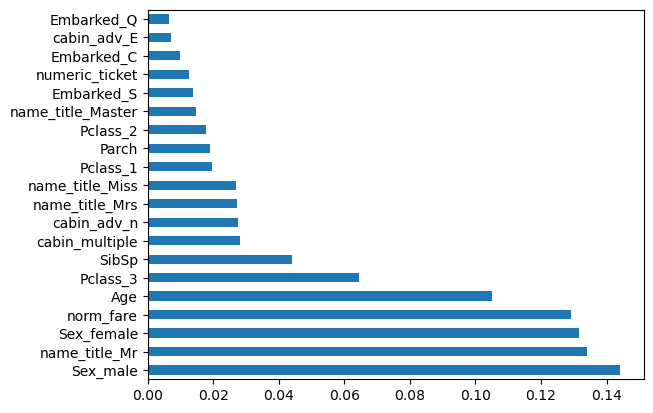

In [41]:
# Taking a look at the RandomForest feature importances
best_rf = tuned_models['Random Forest Classifier'].fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [42]:
# XGB is the best performer so far so let's generate a submissions file using the trained model
xgb_predictions = tuned_models['XGB Classifier'].predict(X_test_scaled).astype(int)
generate_submissions_csv(xgb_predictions, '02_xgb_tuned_submission.csv')

File "02_xgb_tuned_submission.csv" saved to <.\submissions>


### Model Additional Ensemble Approaches
1) Experimented with a <b>Hard Voting</b> classifier of three estimators (KNN, SVM, RF) (<b>81.6%</b>)

2) Experimented with a <b>Soft Voting</b> classifier of three estimators (KNN, SVM, RF) (<b>82.3%</b>) (Best Performance)

3) Experimented with <b>Soft Voting on all estimators</b> performing better than 80% except xgb (KNN, RF, LR, SVC) (<b>82.9%</b>)

4) Experimented with <b>Soft Voting on all estimators including XGB</b> (KNN, SVM, RF, LR, XGB) (<b>83.5%</b>)

Let's run a voting classifier using the tuned models. I also want to try and eliminate some of the models to see if that improves performance.

In [51]:
tuned_model_tuples = [(model_name, model) for model_name, model in tuned_models.items() if model_name not in ['Logistic Regression', 'KNeighbors Classifier']]
voting_clf_all = VotingClassifier(estimators=tuned_model_tuples, voting='soft')
model_evaluation({'Voting Classifier': voting_clf_all}, X_train_scaled, y_train)

Voting Classifier:
- CV scores: 83.7% | 82.6% | 84.3% | 80.9% | 86.4%
- CV mean: 83.6%



In [52]:
tuned_model_tuples = [(model_name, model) for model_name, model in tuned_models.items() if model_name not in ['Logistic Regression']]
voting_clf_no_lr = VotingClassifier(estimators=tuned_model_tuples, voting='soft')
model_evaluation({'Voting Classifier': voting_clf_no_lr}, X_train_scaled, y_train)

Voting Classifier:
- CV scores: 83.1% | 83.1% | 84.3% | 80.9% | 87.0%
- CV mean: 83.7%



In [53]:
tuned_model_tuples = [(model_name, model) for model_name, model in tuned_models.items()]
voting_clf_all = VotingClassifier(estimators=tuned_model_tuples, voting='soft')
model_evaluation({'Voting Classifier': voting_clf_all}, X_train_scaled, y_train)

Voting Classifier:
- CV scores: 83.7% | 83.1% | 84.3% | 80.9% | 87.0%
- CV mean: 83.8%



In [46]:
# Let's remove the worst performing models to try and tune a voting classifier with fewer parameters
# del tuned_models['Logistic Regression']
# del tuned_models['SVC']
# del tuned_models['KNeighbors Classifier']

In [55]:
# In a soft voting classifier you can apply weights to each of the models. Let's use a grid search to explore different weightings:
import itertools
combinations = itertools.product([1, 2], repeat=len(tuned_model_tuples))  # Generate all possible combinations of weights
combinations = [list(comb) for comb in combinations if len(set(comb)) != 1]  # Filter out the combinations where all elements are the same

voting_classifier_params = {'Voting Classifier': {'weights': combinations, 'voting': ['soft', 'hard']}}

tuned_voting_clf = model_optimisation(
    {'Voting Classifier': voting_clf_all},
    X_train_scaled,
    y_train,
    voting_classifier_params
)

Voting Classifier:
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
- Best Score: 85.8%
- Best Parameters: {'voting': 'hard', 'weights': [1, 1, 2, 1, 3]}



In [ ]:
# Final submission file from the tuned voting classifier
tuned_voting_clf_preds = tuned_voting_clf['Voting Classifier'].predict(X_test_scaled).astype(int)
generate_submissions_csv(xgb_predictions, '03_voting_clf_tuned_submission.csv')